In [2]:
import numpy as np
import pandas as pd
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt
import matplotlib
import os
import seaborn as sns
import tensorflow as tf
import math
import sklearn.metrics as metrics
import scipy.stats.distributions as dist
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# path = '/content/drive/MyDrive/KIN_TRAINING_DATASETS/'
# tab = Table.read(path + 'datatable.dat',format='ascii', header_start = 0)

In [ ]:
# path2 = '/content/drive/MyDrive/FITS_FILES/'
# cat = Table.read(path2 + 'Magneticum_fullcat_150921.fits',format='fits', hdu = 1)

In [3]:
path2 = '/content/drive/MyDrive/FITS_FILES/'
cat = Table.read(path2 + 'Magneticum_fullcat_271021.fits',format='fits', hdu = 1)

In [ ]:
cat

MAG_ID,LOG_M_SOL,R_50,LAMBDA_R90,ELLIP_R90,CNN_CLASS,CNN_OR_PROB,CNN_NOR_PROB
int32,float64,float64,float64,float64,int64,float32,float32
0,12.4631,22.7843,0.272619,0.252413,2,0.45290422,0.5470958
10053,11.6338,17.2907,0.23733,0.307363,0,0.10843917,0.8915608
10054,11.1543,7.62139,0.165087,0.253122,0,0.22160637,0.7783936
10055,10.5168,3.82655,0.0989245,0.302413,0,0.10303773,0.8969623
10056,10.3271,4.89382,0.35832,0.612865,1,0.9968748,0.0031251307
10057,10.2492,2.37296,0.531016,0.441878,1,0.9937118,0.0062881447
10058,10.1583,2.57416,0.359248,0.430585,1,0.92596376,0.074036285
10060,10.0888,3.05225,0.558069,0.547979,1,0.9752371,0.024762902
10230,10.6421,5.96167,0.283309,0.57913,1,0.9976535,0.002346489


In [ ]:
np.where(cat.field('MAG_ID') != CATID12)

(array([0]),)

In [ ]:
for i in range(0, np.size(CATID12)):
  cat = cat[np.where(cat.field('MAG_ID') != CATID12[i])]

In [ ]:
np.size(cat)

1882

In [ ]:
print(np.size(cat))
cat[0:5]

1882


MAG_ID,LOG_M_SOL,R_50,LAMBDA_R90,ELLIP_R90,CNN_CLASS,CNN_OR_PROB,CNN_NOR_PROB
int32,float64,float64,float64,float64,int64,float32,float32
0,12.4631,22.7843,0.272619,0.252413,2,0.45290422,0.5470958
10053,11.6338,17.2907,0.23733,0.307363,0,0.10843917,0.8915608
10054,11.1543,7.62139,0.165087,0.253122,0,0.22160637,0.7783936
10055,10.5168,3.82655,0.0989245,0.302413,0,0.10303773,0.8969623
10056,10.3271,4.89382,0.35832,0.612865,1,0.9968748,0.0031251307


In [ ]:
# cat_test = cat
# cat_test = cat_test[np.where(cat.field('LOG_M_SOL') < 10.05)]

In [ ]:
# guess_2 = cat.field('MAG_ID')

In [ ]:
# guess_2 = np.array(guess_2)

# Not Needed

In [ ]:
r = cat.write(path2 + 'Magneticum_fullcat_271021.fits', format = 'fits')

In [ ]:
ids1 = tab.field('ID')
mass = tab.field('logM*/Msun')
r50 = tab.field('R1/2[kpc]')
lambdar = tab.field('lambdaR_edgeon')
ellip = tab.field('ellipticity_edgeon')

In [ ]:
np.size(ids1)

2061

In [ ]:
path = '/content/drive/MyDrive/KIN_TRAINING_DATASETS/'

mag_class = np.load(path + 'mag_class_271021.npy')
# mag_std = np.load(path + 'mag_std_271021.npy')
mag_OR = np.load(path + 'mag_OR_271021.npy')
mag_NOR = np.load(path + 'mag_NOR_271021.npy')
mag_ID = np.load(path + 'mag_catid_271021.npy')

In [ ]:
np.size(mag_ID)

1897

In [ ]:
N = np.size(mag_ID)
masses = np.zeros((N))
r50s = np.zeros((N))
lambdars = np.zeros((N))
ellips = np.zeros((N))
for i in range(0, N):
  id = mag_ID[i]
  idx = np.where(id == ids1)[0][0]
  masses[i] = mass[idx]
  r50s[i] = r50[idx]
  lambdars[i] = lambdar[idx]
  ellips[i] = ellip[idx]
  

In [ ]:
np.size(masses)

1897

In [ ]:
mass[0]

12.4631

In [ ]:
cat5

MAG_ID,LMSTAR,R_E,ELLIP,LAMBDA_R,MAIN/SUB,CNN_CLASS,CNN_OR_PROB,CNN_NOR_PROB,CNN_STD,CNN_CLASS_FINAL
int32,float64,float64,float64,float64,bytes4,int64,float32,float32,float32,int64
0,12.4631,12.4631,0.252413,0.272619,main,1,0.7569227,0.24307728,0.20616549,1
10053,11.6338,11.6338,0.307363,0.23733,main,0,0.07054046,0.9294596,0.065119684,0
10054,11.1543,11.1543,0.253122,0.165087,sub,1,0.8321117,0.16788834,0.19179058,1
10055,10.5168,10.5168,0.302413,0.0989245,sub,0,0.11741711,0.88258284,0.119527236,0
10056,10.3271,10.3271,0.612865,0.35832,sub,1,0.9975279,0.0024721134,0.012204941,1
10057,10.2492,10.2492,0.441878,0.531016,sub,1,0.9960617,0.0039382908,0.028435241,1
10058,10.1583,10.1583,0.430585,0.359248,sub,1,0.7902966,0.20970336,0.19677024,1
10060,10.0888,10.0888,0.547979,0.558069,sub,1,0.99784136,0.0021586895,0.02459068,1
10230,10.6421,10.6421,0.57913,0.283309,sub,1,0.99985886,0.00014111504,0.004177373,1


In [ ]:
path2 = '/content/drive/MyDrive/FITS_FILES/'
cat = Table.read(path2 + 'mag_cnn1.fits', format = 'fits')

In [ ]:
cat = Table([mag_ID, masses, r50s, lambdars, ellips, mag_class, mag_OR, mag_NOR], 
          names=('MAG_ID','LOG_M_SOL', 'R_50', 'LAMBDA_R90', 'ELLIP_R90', 'CNN_CLASS', 'CNN_OR_PROB', 'CNN_NOR_PROB'))


In [ ]:
cat

MAG_ID,LOG_M_SOL,R_50,LAMBDA_R90,ELLIP_R90,CNN_CLASS,CNN_OR_PROB,CNN_NOR_PROB
int32,float64,float64,float64,float64,int64,float32,float32
0,12.4631,22.7843,0.272619,0.252413,2,0.45290422,0.5470958
10053,11.6338,17.2907,0.23733,0.307363,0,0.10843917,0.8915608
10054,11.1543,7.62139,0.165087,0.253122,0,0.22160637,0.7783936
10055,10.5168,3.82655,0.0989245,0.302413,0,0.10303773,0.8969623
10056,10.3271,4.89382,0.35832,0.612865,1,0.9968748,0.0031251307
10057,10.2492,2.37296,0.531016,0.441878,1,0.9937118,0.0062881447
10058,10.1583,2.57416,0.359248,0.430585,1,0.92596376,0.074036285
10060,10.0888,3.05225,0.558069,0.547979,1,0.9752371,0.024762902
10230,10.6421,5.96167,0.283309,0.57913,1,0.9976535,0.002346489


In [ ]:
cat5['CNN_CLASS'] = mag_class
cat5['CNN_OR_PROB'] = mag_OR
cat5['CNN_NOR_PROB'] = mag_NOR
cat5['CNN_STD'] = mag_std

In [ ]:
np.sum(mag_class)/500

0.586

In [ ]:
cat

MAG_ID,LOG_M_SOL,R_50,LAMBDA_R90,ELLIP_R90,CNN_CLASS,CNN_OR_PROB,CNN_NOR_PROB,MAG_STD,CNN_CLASS_FINAL
int32,float64,float64,float64,float64,int64,float32,float32,float32,int64
0,12.4631,22.7843,0.272619,0.252413,0,0.2028814,0.7971186,0.10846339,0
10053,11.6338,17.2907,0.23733,0.307363,0,0.115833916,0.8841661,0.05788418,0
10054,11.1543,7.62139,0.165087,0.253122,0,0.09924093,0.9007591,0.07798258,0
10055,10.5168,3.82655,0.0989245,0.302413,0,0.46158218,0.5384178,0.09125125,2
10056,10.3271,4.89382,0.35832,0.612865,1,0.9212265,0.07877348,0.053375736,1
10057,10.2492,2.37296,0.531016,0.441878,1,0.9793917,0.020608302,0.018056361,1
10058,10.1583,2.57416,0.359248,0.430585,0,0.19417815,0.80582184,0.1442625,0
10060,10.0888,3.05225,0.558069,0.547979,1,0.95223653,0.047763437,0.045335628,1
10230,10.6421,5.96167,0.283309,0.57913,1,0.8894322,0.11056782,0.08094149,1


# Analysis

In [ ]:
# OR_prob = cat.field('CNN_OR_PROB')
# NOR_prob = cat.field('CNN_NOR_PROB')
# cnn_std = cat.field('MAG_STD')
# cnn_class2 = []

# for i in range(0, np.size(cnn_std)):
#   val1 = OR_prob[i] - cnn_std[i]
#   val2 = NOR_prob[i] - cnn_std[i]

#   if val1 > 0.5:
#     cnn_class2.append(1)
#   elif val2 > 0.5:
#     cnn_class2.append(0)
#   else:
#     cnn_class2.append(2)

# cat['CNN_CLASS_FINAL'] = cnn_class2

In [4]:
mag_ID = cat.field('MAG_ID')
mag_ellip = cat.field('ELLIP_R90')
mag_lambdar = cat.field('LAMBDA_R90')
mag_class = cat.field("CNN_CLASS")
mag_mass = cat.field("LOG_M_SOL")
mag_re = cat.field("R_50")

In [ ]:
# mag_class = cat.field('CNN_CLASS_FINAL')
# mag_OR = cat.field('CNN_OR_PROB')
# mag_NOR = cat.field('CNN_NOR_PROB')
# mag_IDs = cat.field('MAG_ID')
# mag_lmsol = cat.field('LOG_M_SOL')
# # mag_lmsol50 = cat.field('LOG_M_SOL50')
# mag_r50 = cat.field('R_50')
# # mag_z = cat.field('REDSHIFT')
# # mag_numspaxel = cat.field('NUM_SPAXEL')
# mag_ellip90 = cat.field('ELLIP_R90')
# mag_lambdar90 = cat.field('LAMBDA_R90')
# # mag_ellip60 = cat.field('ELLIP60')
# # mag_lambdar60 = cat.field('LAMBDA_R60')
# # mag_minvel = cat.field('VMIN')
# # mag_maxvel = cat.field('VMAX')
# # mag_minsig = cat.field('SMIN')
# # mag_maxsig = cat.field('SMAX')
# # mag_radhi = cat.field('RADHI')
# # mag_ang = cat.field('ANGULAR_SCALE')

(array([ 216.,    0.,    0.,    0.,    0., 1510.,    0.,    0.,    0.,
         171.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

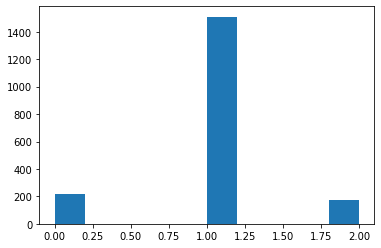

In [5]:
plt.hist(mag_class)

In [ ]:
X_mag_vel = np.load('/content/drive/MyDrive/KIN_TRAINING_DATASETS/vel_mag_271021.npy')
X_mag_sig = np.load('/content/drive/MyDrive/KIN_TRAINING_DATASETS/sig_mag_271021.npy')

mag_IDSS = np.load('/content/drive/MyDrive/KIN_TRAINING_DATASETS/catid_mag_271021.npy')

# stack the velocity and sigma maps 

mag_maps = np.concatenate((X_mag_vel, X_mag_sig), axis = 3)



In [ ]:
CATID12 = [15791, 16003, 16900, 17296, 18832, 20229, 20400, 20500, 20866,
       21162, 22113, 25155, 26371,  6467,  7902]

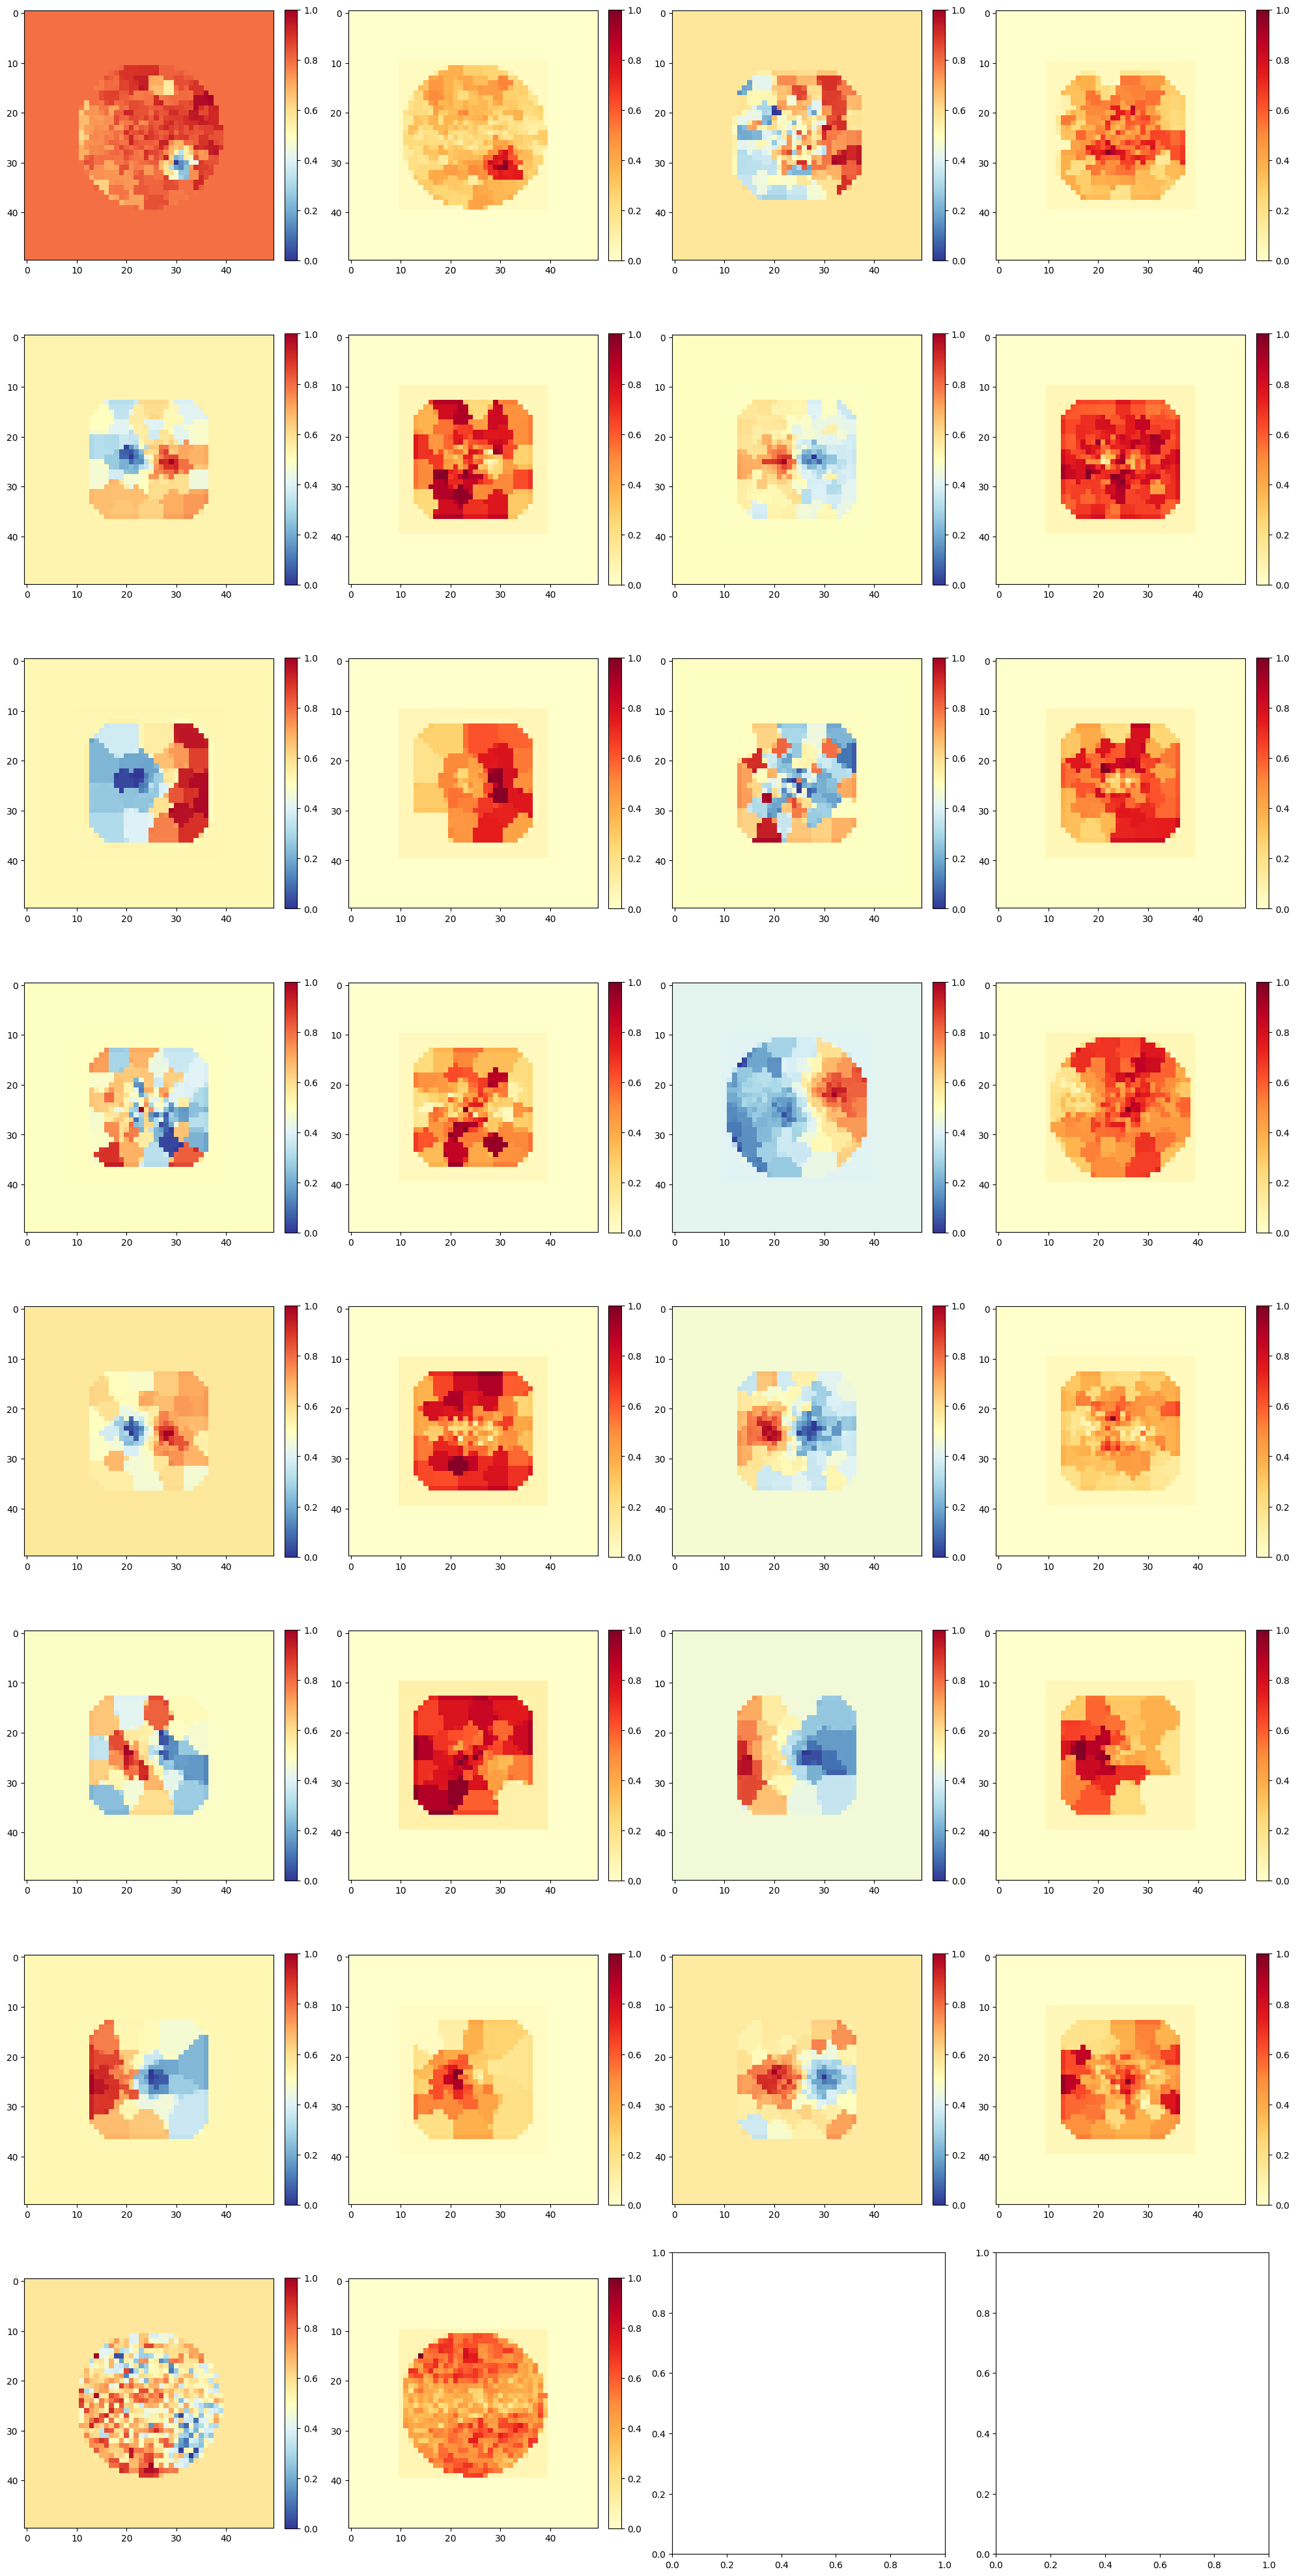

In [ ]:
matplotlib.rc_file_defaults()

catids_use = CATID12[0:20]
x = np.size(catids_use)
x4 = int(np.floor(x/2))
classes = ['NOR', 'OR', 'UNK']
# pp = PdfPages('EAGLE_UNKNOWN_LAMBDA.pdf')

if x%2 == 0:
  fig, axs = plt.subplots(x4, 4, figsize = (20, 40))
else:
  fig, axs = plt.subplots(x4+1, 4, figsize = (20, 40))

for i in range(0,x):
  catid = catids_use[i]
  idx = np.where(mag_IDSS == catid)[0][0]
  velmap = mag_maps[idx, :, :, 0]
  sigmap = mag_maps[idx, :, :, 1]
  # vmin1 = vmin[i]
  idx2 = np.where(mag_ID == catid)[0][0]
  # mass = np.round(mag_lmsol[idx2], 4)
  # lambda_r = np.round(mag_lambdar90[idx2], 4)
  # ellip = np.round(mag_ellip90[idx2], 4)
  # vmin1 = np.round(mag_minvel[idx2], 4)
  # vmax1 = np.round(mag_maxvel[idx2], 4)
  # smin1 = np.round(mag_minsig[idx2], 4)
  # smax1 = np.round(mag_maxsig[idx2], 4)
  # red1 = np.round(mag_z[idx2], 4)
  # eclass1 = classes[mag_class[idx2]]
 
  # ang = mag_ang[idx2]
  # radius = mag_r50[idx2]
  # a1 = (radius*2)
  # b1 = -1*(ellip - 1)*a1

  if i%2 == 0:
    ii = int(i/2)
    a = axs[ii, 0].imshow(velmap, cmap='RdYlBu_r', vmax = 1, vmin = 0)
    fig.colorbar(a, ax=axs[ii, 0], fraction=0.046, pad=0.04)
    # axs[ii, 0].set_title('CATID: ' + str(catid) + '  CLASS: ' + str(eclass1) + '\n LOG MASS: ' + str(mass), fontsize = 10)
    # axs[ii, 0].text(1,2,'VMIN: ' + str(vmin1), fontsize = 8)
    # axs[ii, 0].text(1,4,'VMAX: ' + str(vmax1), fontsize = 8)
    # axs[ii, 0].text(1,46,'ELLIP: ' + str(ellip), fontsize = 8)
    # axs[ii, 0].text(1,48,'LAMBDA_R: ' + str(lambda_r), fontsize = 8)
    # axs[ii, 0].add_patch(matplotlib.patches.Ellipse((25, 25), a1,b1, ls = '--', fill=False))


    b = axs[ii, 1].imshow(sigmap, cmap='YlOrRd')
    fig.colorbar(b, ax=axs[ii, 1], fraction=0.046, pad=0.04)
    # axs[ii, 1].set_title('CATID: ' + str(catid) + '  CLASS: ' + eclass1 + '\n LOG MASS: ' + str(mass), fontsize = 10)
    # axs[ii, 1].text(1,2,'SMIN: ' + str(smin1), fontsize = 8)
    # axs[ii, 1].text(1,4,'SMAX: ' + str(smax1), fontsize = 8)
    # axs[ii, 1].text(1,46,'ELLIP: ' + str(ellip), fontsize = 8)
    # axs[ii, 1].text(1,48,'LAMBDA_R: ' + str(lambda_r), fontsize = 8)
    # axs[ii, 1].add_patch(matplotlib.patches.Ellipse((25, 25), a1,b1, ls = '--', fill=False))
  
  else:
    ii = int((i-1)/2)
    a = axs[ii, 2].imshow(velmap, cmap='RdYlBu_r', vmax = 1, vmin = 0)
    fig.colorbar(a, ax=axs[ii, 2], fraction=0.046, pad=0.04)
    # axs[ii, 2].set_title('CATID: ' + str(catid) + '  CLASS: ' + eclass1 + '\n LOG MASS: ' + str(mass), fontsize = 10)
    # axs[ii, 2].text(1,2,'VMIN: ' + str(vmin1), fontsize = 8)
    # axs[ii, 2].text(1,4,'VMAX: ' + str(vmax1), fontsize = 8)
    # axs[ii, 2].text(1,46,'ELLIP: ' + str(ellip), fontsize = 8)
    # axs[ii, 2].text(1,48,'LAMBDA_R: ' + str(lambda_r), fontsize = 8)
    # axs[ii, 2].add_patch(matplotlib.patches.Ellipse((25, 25), a1,b1, ls = '--', fill=False))

    b = axs[ii, 3].imshow(sigmap, cmap='YlOrRd')
    # axs[ii, 3].set_title('CATID: ' + str(catid) + '  CLASS: ' + eclass1 + '\n LOG MASS: ' + str(mass), fontsize = 10)
    fig.colorbar(b, ax=axs[ii, 3], fraction=0.046, pad=0.04)
    # axs[ii, 3].text(1,2,'SMIN: ' + str(smin1), fontsize = 8)
    # axs[ii, 3].text(1,4,'SMAX: ' + str(smax1), fontsize = 8)
    # axs[ii, 3].text(1,46,'ELLIP: ' + str(ellip), fontsize = 8)
    # axs[ii, 3].text(1,48,'LAMBDA_R: ' + str(lambda_r), fontsize = 8)
    # axs[ii, 3].add_patch(matplotlib.patches.Ellipse((25, 25), a1,b1, ls = '--', fill=False))

plt.tight_layout()
plt.show()

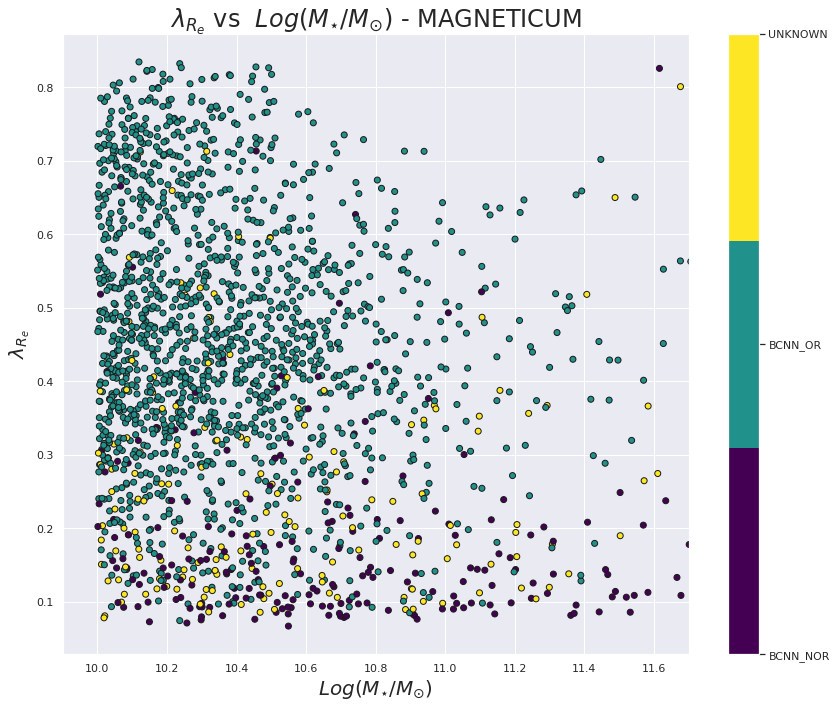

In [ ]:
labels = ['BCNN_NOR', 'BCNN_OR', 'UNKNOWN']
sns.set_theme()

fig, ax = plt.subplots(figsize = (12, 10))
plt.scatter(mag_mass, mag_lambdar, c = mag_class, edgecolors='k', cmap = plt.cm.get_cmap('viridis', 3))
plt.xlabel('$Log(M_{\star}/M_{\odot}$)', fontsize = 20)
plt.ylabel(r'$\lambda_{R_e}$', fontsize = 20)
plt.title(r'$\lambda_{R_e}$ vs  $Log(M_{\star}/M_{\odot}$) - MAGNETICUM', fontsize = 24)
plt.xlim(9.9, 11.7)

# This function formatter will replace integers with target names
formatter = plt.FuncFormatter(lambda val, loc: labels[val])

# We must be sure to specify the ticks matching our target names
plt.colorbar(ticks=[0, 1, 2], format=formatter);
plt.tight_layout()
plt.show()

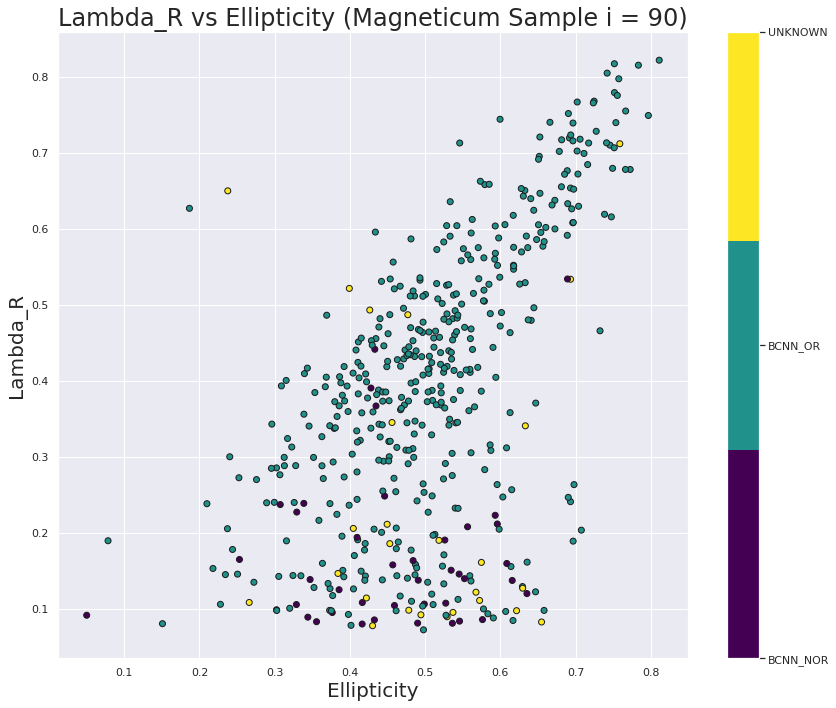

In [ ]:
labels = ['BCNN_NOR', 'BCNN_OR', 'UNKNOWN']
sns.set_theme()

fig, ax = plt.subplots(figsize = (12, 10))
plt.scatter(mag_ellip90, mag_lambdar90, c = mag_class, edgecolors='k', cmap = plt.cm.get_cmap('viridis', 3))
plt.xlabel('Ellipticity', fontsize = 20)
plt.ylabel('Lambda_R', fontsize = 20)
plt.title('Lambda_R vs Ellipticity (Magneticum Sample i = 90)', fontsize = 24)
# plt.ylim(0, 30)
# plt.xlim(0, 10**11)
# ax.set_facecolor('xkcd:light grey')

# This function formatter will replace integers with target names
formatter = plt.FuncFormatter(lambda val, loc: labels[val])

# We must be sure to specify the ticks matching our target names
plt.colorbar(ticks=[0, 1, 2], format=formatter);
plt.tight_layout()
plt.show()

In [ ]:
labels_test = cat.field('CNN_CLASS')
OR_loc = np.where(labels_test == 1)
cat_OR  = cat[OR_loc]

NOR_loc = np.where(labels_test == 0)
cat_NOR  = cat[NOR_loc]

UNKNOWN_loc = np.where(labels_test == 2)
cat_UNKNOWN  = cat[UNKNOWN_loc]

In [ ]:
cat_test = cat_NOR
cat_test = cat_test[np.where(cat_test.field('LAMBDA_R90') > 0.4)]

In [ ]:
np.array(cat_test.field('MAG_ID'))

array([15791, 16003, 16900, 17296, 18832, 20229, 20400, 20500, 20866,
       21162, 22113, 25155, 26371,  6467,  7902], dtype=int32)

In [ ]:
lmstar_OR = cat_OR.field('LOG_M_SOL')
lmstar_NOR = cat_NOR.field('LOG_M_SOL')
lmstar_UNKNOWN = cat_UNKNOWN.field('LOG_M_SOL')

In [ ]:
# eagle_class_OR = cat_OR.field('CNN_CLASS')
# eagle_OR_OR = cat_OR.field('CNN_OR_PROB')
# eagle_NOR_OR = cat_OR.field('CNN_NOR_PROB')
# eagle_ID_OR = cat_OR.field('EAGLE_ID')
# eagle_m_sol_OR = cat_OR.field('LOG_M_SOL')
# eagle_m_sol50_OR = cat_OR.field('LOG_M_SOL50')
# eagle_r50_OR = cat_OR.field('R_50')
# eagle_r50_proj_OR = cat_OR.field('R50_PROJ')
# eagle_re_r_OR = cat_OR.field('RE_RBAND')
# eagle_z_OR = cat_OR.field('REDSHIFT')
# eagle_ellip60_OR = cat_OR.field('ELLIP_i60')
# eagle_lambdar60_OR = cat_OR.field('LAMBDA_i60')
# eagle_spaxels_OR = cat_OR.field('NUM_SPAXEL')
# eagle_ellip90_OR = cat.field('ELLIP_i90')
# eagle_lambdar90_OR = cat.field('LAMBDA_i90')

# eagle_class_NOR = cat_NOR.field('CNN_CLASS')
# eagle_OR_NOR = cat_NOR.field('CNN_OR_PROB')
# eagle_NOR_NOR = cat_NOR.field('CNN_NOR_PROB')
# eagle_ID_NOR = cat_NOR.field('EAGLE_ID')
# eagle_m_sol_NOR = cat_NOR.field('LOG_M_SOL')
# eagle_m_sol50_NOR = cat_NOR.field('LOG_M_SOL50')
# eagle_r50_NOR = cat_NOR.field('R_50')
# eagle_r50_proj_NOR = cat_NOR.field('R50_PROJ')
# eagle_re_r_NOR = cat_NOR.field('RE_RBAND')
# eagle_z_NOR = cat_NOR.field('REDSHIFT')
# eagle_ellip60_NOR = cat_NOR.field('ELLIP_i60')
# eagle_lambdar60_NOR = cat_NOR.field('LAMBDA_i60')
# eagle_spaxels_NOR = cat_NOR.field('NUM_SPAXEL')
# eagle_ellip90_NOR = cat.field('ELLIP_i90')
# eagle_lambdar90_NOR = cat.field('LAMBDA_i90')

# eagle_class_UNKNOWN = cat_UNKNOWN.field('CNN_CLASS')
# eagle_OR_UNKNOWN = cat_UNKNOWN.field('CNN_OR_PROB')
# eagle_NOR_UNKNOWN = cat_UNKNOWN.field('CNN_NOR_PROB')
# eagle_ID_UNKNOWN = cat_UNKNOWN.field('EAGLE_ID')
# eagle_m_sol_UNKNOWN = cat_UNKNOWN.field('LOG_M_SOL')
# eagle_m_sol50_UNKNOWN = cat_UNKNOWN.field('LOG_M_SOL50')
# eagle_r50_UNKNOWN = cat_UNKNOWN.field('R_50')
# eagle_r50_proj_UNKNOWN = cat_UNKNOWN.field('R50_PROJ')
# eagle_re_r_UNKNOWN = cat_UNKNOWN.field('RE_RBAND')
# eagle_z_UNKNOWN = cat_UNKNOWN.field('REDSHIFT')
# eagle_ellip60_UNKNOWN = cat_UNKNOWN.field('ELLIP_i60')
# eagle_lambdar60_UNKNOWN = cat_UNKNOWN.field('LAMBDA_i60')
# eagle_spaxels_UNKNOWN = cat_UNKNOWN.field('NUM_SPAXEL')
# eagle_ellip90_UNKNOWN = cat.field('ELLIP_i90')
# eagle_lambdar90_UNKNOWN = cat.field('LAMBDA_i90')

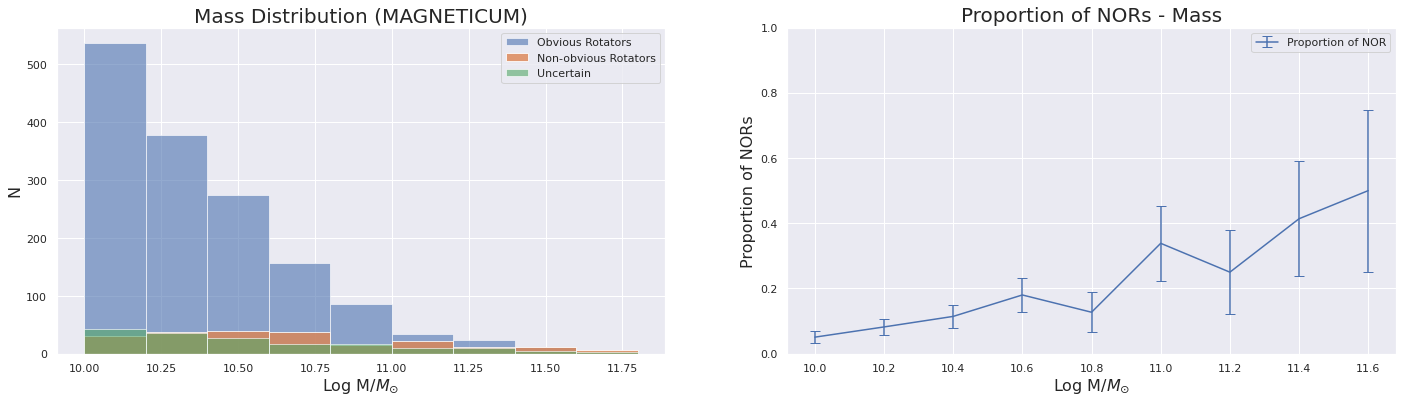

In [ ]:
sns.set_theme()
fig, axs = plt.subplots(1,2, figsize = (24,6))
bins = np.arange(10.0, 12, 0.2)
counts, bins, bars = axs[0].hist(lmstar_OR, alpha = 0.6, bins = bins, label = 'Obvious Rotators')
counts1, bins1, bars1 = axs[0].hist(lmstar_NOR, alpha = 0.8, bins = bins, label = 'Non-obvious Rotators')
counts2, bins2, bars2 = axs[0].hist(lmstar_UNKNOWN, alpha = 0.6, bins = bins, label = 'Uncertain')

axs[0].legend()
axs[0].set_title('Mass Distribution (MAGNETICUM)', fontsize = 20)
axs[0].set_xlabel('Log M/$M_{\odot}}$', fontsize = 16)
axs[0].set_ylabel('N', fontsize = 16)
# axs[0].set_xscale('log')

error = []
n_vals = []
k_vals = []
prop_vals = []
for i in range(0, np.size(counts)):
  n = counts[i]+ counts1[i] + counts2[i]
  n_vals.append(n)

  k = counts2[i]
  k_vals.append(k)
  
  prop = counts2[i]/n
  prop_vals.append(prop)

  c = 0.68

  p_lower = dist.beta.ppf((1-c)/2.,k+1,n-k+1)
  p_upper = dist.beta.ppf(1-(1-c)/2.,k+1,n-k+1)

  error.append(p_upper-p_lower)

error = np.array(error)

#Second error plot

error_2 = []
n_vals_2 = []
k_vals_2 = []
prop_vals_2 = []

for i in range(0, np.size(counts)):
  n = counts[i]+ counts1[i] + counts2[i]
  n_vals_2.append(n)

  k = counts1[i]
  k_vals_2.append(k)
  
  prop = counts1[i]/n
  prop_vals_2.append(prop)

  c = 0.68

  p_lower = dist.beta.ppf((1-c)/2.,k+1,n-k+1)
  p_upper = dist.beta.ppf(1-(1-c)/2.,k+1,n-k+1)

  error_2.append(p_upper-p_lower)


error_2 = np.array(error_2)

error_3 = []
n_vals_3 = []
k_vals_3 = []
prop_vals_3 = []

for i in range(0, np.size(counts)):
  n = counts[i]+ counts1[i]
  n_vals_3.append(n)

  k = counts[i]
  k_vals_3.append(k)
  
  prop = counts[i]/n
  prop_vals_3.append(prop)

  c = 0.68

  p_lower = dist.beta.ppf((1-c)/2.,k+1,n-k+1)
  p_upper = dist.beta.ppf(1-(1-c)/2.,k+1,n-k+1)

  error_3.append(p_upper-p_lower)


error_3 = np.array(error_3)


bins_2 = bins[:-1]
lolims = np.zeros(np.size(counts))

# axs[1].errorbar(bins_2, prop_vals, yerr = error, capsize=5, lolims = lolims, c = 'r', label = 'Proportion of Unknown')
axs[1].errorbar(bins_2, prop_vals_2, yerr = error_2, capsize=5, lolims = lolims, c = 'b', label = 'Proportion of NOR')
axs[1].legend()
# axs[1].set_xscale('log')
axs[1].set_title('Proportion of NORs - Mass', fontsize = 20)
axs[1].set_ylabel('Proportion of NORs', fontsize = 16)
axs[1].set_xlabel('Log M/$M_{\odot}}$', fontsize = 16)
axs[1].set_ylim(0, 1)

# axs[2].errorbar(bins_2, prop_vals, yerr = error, capsize=5, c = 'r', label = 'Proportion of Total')
# axs[2].errorbar(bins_2, prop_vals_3, yerr = error_3, capsize=5, lolims = lolims, c = 'k', label = 'Proportion of Classified')
# # axs[2].errorbar(bins_2, prop_vals_2, yerr = error_2, capsize=5, lolims = lolims, c = 'b', label = 'Proportion of Classified')
# axs[2].legend()

# axs[2].set_title('Proportion of ORs - Mass', fontsize = 20)
# axs[2].set_ylabel('Proportion of ORs', fontsize = 16)
# axs[2].set_xlabel('Log M/$M_{\odot}}$', fontsize = 16)
# axs[2].set_ylim(0, 1)

plt.show()

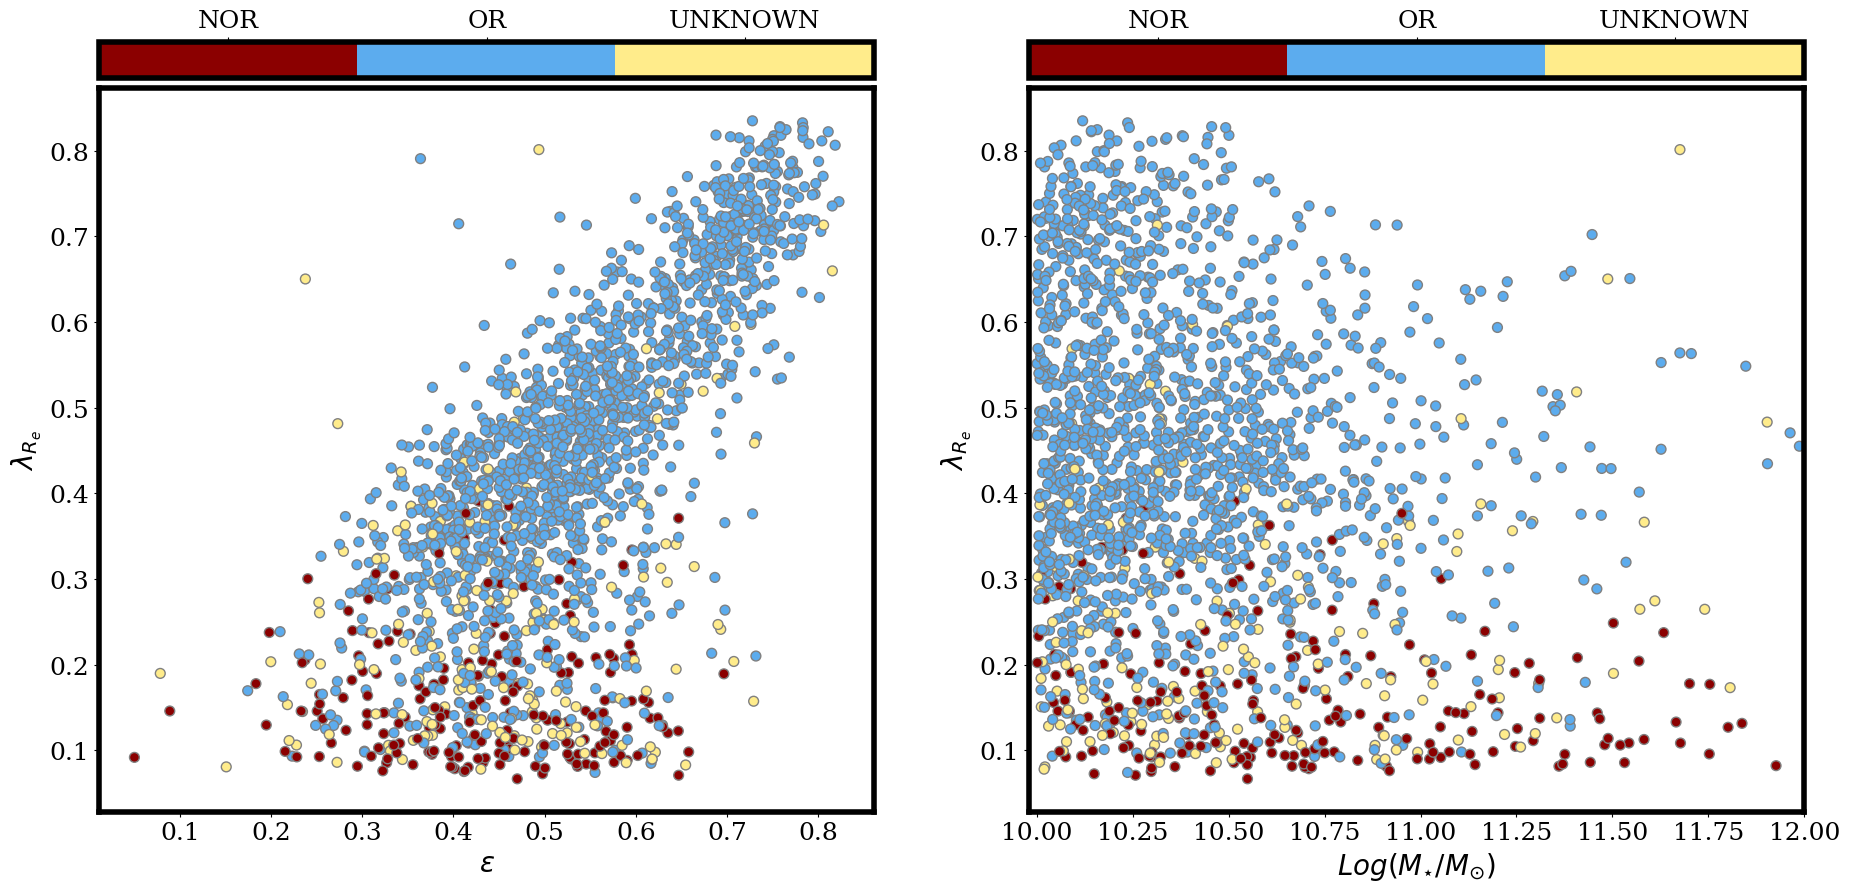

In [ ]:
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib
import matplotlib as mpl
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
mpl.rcParams['font.family'] = 'DejaVu Serif'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 4

# Let's design a dummy land use field

# Let's also design our color mapping: 1s should be plotted in blue, 2s in red, etc...
col_dict={0:"#8B0000",
          1:"#5CACEE",
          2:"#FFEC8B"}

# We create a colormar from our list of colors
cm = ListedColormap([col_dict[x] for x in col_dict.keys()])

# Let's also define the description of each category : 1 (blue) is Sea; 2 (red) is burnt, etc... Order should be respected here ! Or using another dict maybe could help.
labels = np.array(["NOR","OR","UNKNOWN"])
len_lab = len(labels)

# prepare normalizer
## Prepare bins for the normalizer
norm_bins = np.sort([*col_dict.keys()]) + 0.5
norm_bins = np.insert(norm_bins, 0, np.min(norm_bins) - 1.0)
# print(norm_bins)
## Make normalizer and formatter
norm = matplotlib.colors.BoundaryNorm(norm_bins, len_lab, clip=True)
fmt = matplotlib.ticker.FuncFormatter(lambda x, pos: labels[norm(x)])

# Plot our figure
fig,ax = plt.subplots(1,2,  figsize = (22,10))

ax[1].set_xlabel(r'$Log(M_{\star}/M_{\odot})}$', fontsize = 20, fontweight = 'bold')
ax[1].set_ylabel(r'$\lambda_{R_e}$', fontsize = 20, fontweight = 'bold')
ax[1].set_xlim(9.98, 12)

im = ax[1].scatter(mag_mass, mag_lambdar, c = mag_class, edgecolors='grey', cmap = cm, norm = norm, s = 50)
# im = ax.scatter(A, cmap=cm, norm=norm)

divider = make_axes_locatable(ax[1])
cax = divider.new_vertical(size = '5%', pad = 0.1)
fig.add_axes(cax)

diff = norm_bins[1:] - norm_bins[:-1]
tickz = norm_bins[:-1] + diff / 2
cb = fig.colorbar(im, format=fmt, ticks=tickz, cax = cax, orientation = 'horizontal')

cax.xaxis.set_ticks_position('top')
ticks = np.linspace(0,1,20)


ax[0].set_xlabel(r'$\varepsilon$', fontsize = 20, fontweight = 'bold')
ax[0].set_ylabel(r'$\lambda_{R_e}$', fontsize = 20, fontweight = 'bold')

im = ax[0].scatter(mag_ellip, mag_lambdar, c = mag_class, edgecolors='grey', cmap = cm, norm = norm, s = 50)

divider = make_axes_locatable(ax[0])
cax = divider.new_vertical(size = '5%', pad = 0.1)
fig.add_axes(cax)

diff = norm_bins[1:] - norm_bins[:-1]
tickz = norm_bins[:-1] + diff / 2
cb = fig.colorbar(im, format=fmt, ticks=tickz, cax = cax, orientation = 'horizontal')

cax.xaxis.set_ticks_position('top')
ticks = np.linspace(0,1,20)
# ax.yaxis.set_ticks(ticks = ticks)
# ax.yaxis.set_ticks_position('top')

# Make a plot with major ticks that are multiples of 20 and minor ticks that
# are multiples of 5.  Label major ticks with '.0f' formatting but don't label
# minor ticks.  The string is used directly, the `StrMethodFormatter` is
# created automatically.
# ax.xaxis.set_major_locator(MultipleLocator(20))
# # ax.xaxis.set_major_formatter('{x:.0f}')

# # For the minor ticks, use no labels; default NullFormatter.
# ax.xaxis.set_minor_locator(MultipleLocator(5))


# fig.colorbar(a, cax = cax, orientation = 'horizontal', format = formatter, ticks = [0,1,2])

# fig.savefig("example_landuse.png")
plt.show()

In [ ]:
, fill=False, histtype='step', linewidth=3.0

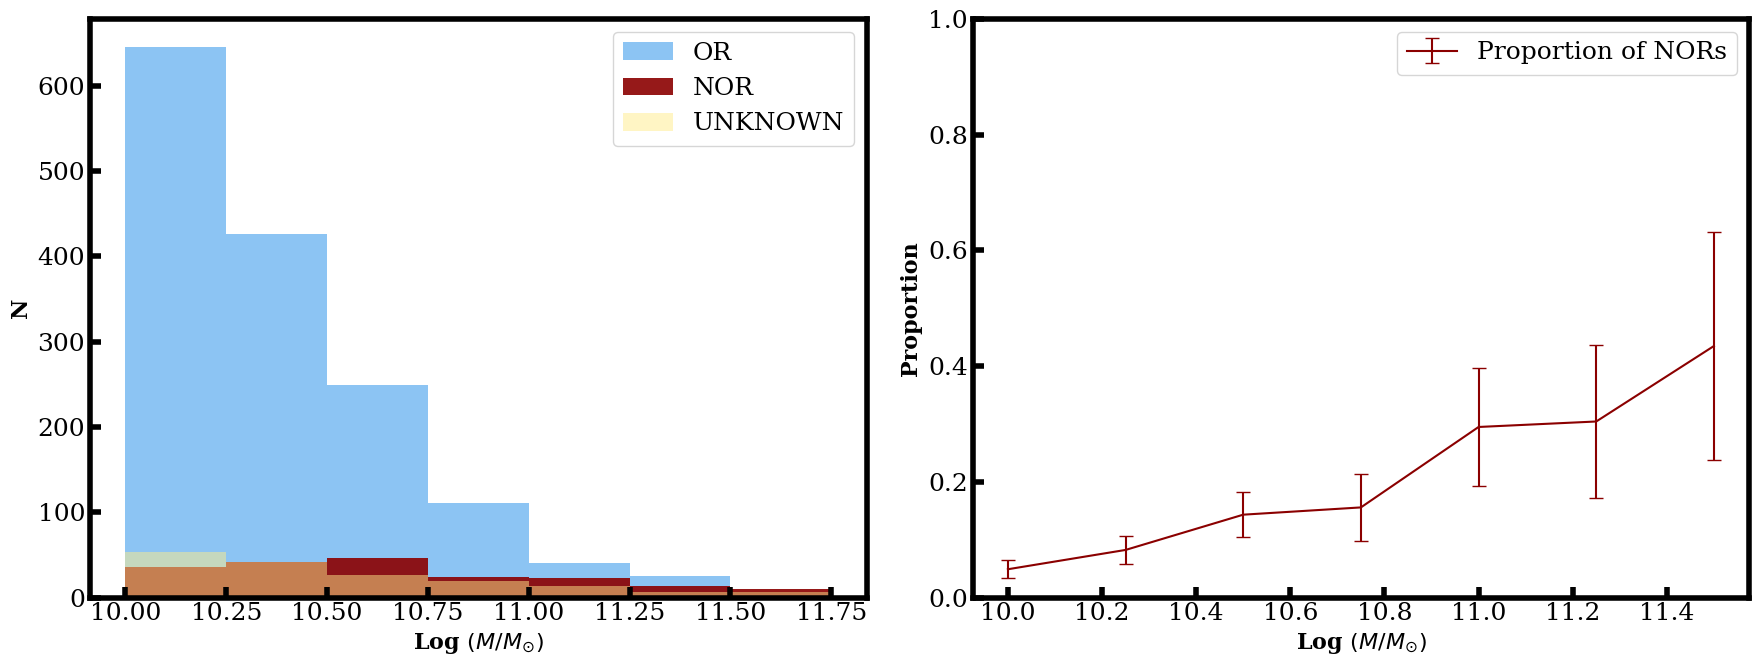

In [ ]:
# sns.set_theme()
col_dict={0:"#8B0000",
          1:"#5CACEE",
          2:"#FFEC8B"}

fig, axs = plt.subplots(1,2, figsize = (18,7))
bins = np.arange(10, 12, 0.25)
counts, bins, bars = axs[0].hist(lmstar_OR, alpha = 0.7, bins = bins, label = 'OR', color = "#5CACEE")
counts1, bins1, bars1 = axs[0].hist(lmstar_NOR, alpha = 0.9, bins = bins, label = 'NOR', color = "#8B0000")
counts2, bins2, bars2 = axs[0].hist(lmstar_UNKNOWN, alpha = 0.5, bins = bins, label = 'UNKNOWN', color = "#FFEC8B")

axs[0].legend()
# axs[0].set_title('Mass Distribution (SAMI)', fontsize = 20)
axs[0].set_xlabel('Log $(M/M_{\odot})})$', fontsize = 16, fontweight = 'bold')
axs[0].set_ylabel('N', fontsize = 16, fontweight = 'bold')
axs[0].tick_params(direction='in', length=8, width=4, colors='k',
               grid_color='k', grid_alpha=0.5)
# axs[0].set_xscale('log')

import scipy.stats.distributions as dist

error = []
n_vals = []
k_vals = []
prop_vals = []
for i in range(0, np.size(counts)):
  n = counts[i]+ counts1[i] + counts2[i]
  n_vals.append(n)

  k = counts1[i]
  k_vals.append(k)
  
  prop = counts1[i]/n
  prop_vals.append(prop)

  c = 0.68

  p_lower = dist.beta.ppf((1-c)/2.,k+1,n-k+1)
  p_upper = dist.beta.ppf(1-(1-c)/2.,k+1,n-k+1)

  error.append(p_upper-p_lower)

error = np.array(error)

#Second error plot

error_2 = []
n_vals_2 = []
k_vals_2 = []
prop_vals_2 = []

for i in range(0, np.size(counts)):
  n = counts[i]+ counts1[i]
  n_vals_2.append(n)

  k = counts1[i]
  k_vals_2.append(k)
  
  prop = counts1[i]/n
  prop_vals_2.append(prop)

  c = 0.68

  p_lower = dist.beta.ppf((1-c)/2.,k+1,n-k+1)
  p_upper = dist.beta.ppf(1-(1-c)/2.,k+1,n-k+1)

  error_2.append(p_upper-p_lower)


error_2 = np.array(error_2)


bins_2 = bins[:-1]
lolims = np.zeros(np.size(counts))

axs[1].errorbar(bins_2, prop_vals, yerr = error, capsize=5, lolims = lolims, c = '#8B0000', label = 'Proportion of NORs')
# axs[1].errorbar(bins_2, prop_vals_2, yerr = error_2, capsize=5, lolims = lolims, c = 'b', label = 'Proportion of Classified')
axs[1].legend()
# axs[1].set_xscale('log')
# axs[1].set_title('Proportion of NORs - Mass', fontsize = 20)
axs[1].set_ylabel('Proportion', fontsize = 16, fontweight = 'bold')
axs[1].set_xlabel('Log $(M/M_{\odot})}$', fontsize = 16, fontweight = 'bold')
axs[1].set_ylim(0, 1)
axs[1].tick_params(direction='in', length=8, width=4, colors='k',
               grid_color='k', grid_alpha=0.5)

plt.tight_layout()
plt.show()